# Phase 1: Data Collection and Database Setup

In [2]:
# installing libraries
import pandas as pd

In [3]:
trxn= pd.read_csv('Retail_Data_Transactions.csv')

In [4]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [5]:
response = pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df= trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [7]:
# Data features
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [8]:
# no of rows and columns
df.shape

(125000, 4)

In [9]:
# first five rows DataFrame
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [10]:
# lasr five rows of DataFrame
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [11]:
# for statistical features (min,max,count, std)
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


# Phase 2: Data Cleaning and Preparation

In [13]:
# finding missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [14]:
# response is 31, and we have total 125000 rows,
(31/125000)*100 

0.024800000000000003

In [15]:
# we will drop the 31 rows as it won't make significant difference in DataFrame.

df= df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [16]:
# Converting date column 'trans_date' to datetime datatype 

df['trans_date']= pd.to_datetime(df['trans_date'])

# Ensuring numerical columns have the correct type
df['response']= df['response'].astype('int64')

C:\Users\bhati\AppData\Local\Temp\ipykernel_20788\2931063182.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\bhati\AppData\Local\Temp\ipykernel_20788\2931063182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\bhati\AppData\Local\Temp\ipykernel_20788\2931063182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [17]:
set(df['response'])

{0, 1}

In [18]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [19]:
# Calculating z-scores for the column
z_scores = (df['tran_amount'] - df['tran_amount'].mean()) / df['tran_amount'].std()

# Defining a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Identifying outliers based on the threshold
outliers = df[abs(z_scores) > threshold]

# Checking if outliers DataFrame is empty
if outliers.empty:
    print("No outliers found.")
else:
    print(outliers)

No outliers found.


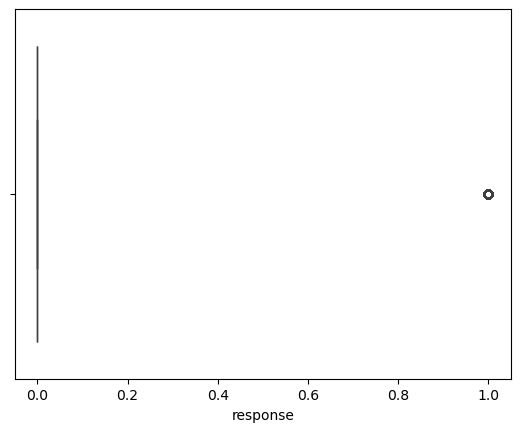

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'])
plt.show()

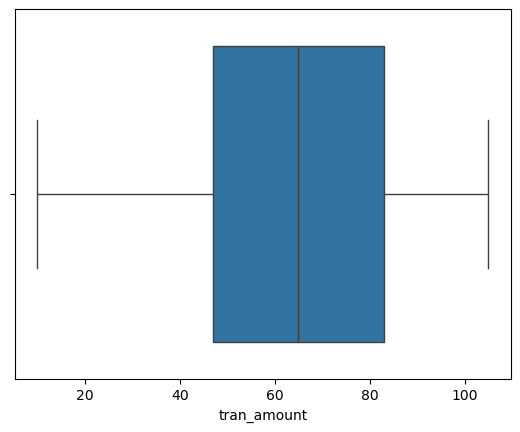

In [21]:
sns.boxplot(x=df['tran_amount'])
plt.show()

## Data Transformation

In [23]:
# Creating new columns

df['month']= df['trans_date'].dt.month

C:\Users\bhati\AppData\Local\Temp\ipykernel_20788\1497527339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['trans_date'].dt.month


In [24]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [25]:
#creating a new 'year' column

df['year']= df['trans_date'].dt.year

C:\Users\bhati\AppData\Local\Temp\ipykernel_20788\2905619276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']= df['trans_date'].dt.year


In [26]:
df

,customer_id,trans_date,tran_amount,response,month,year
0,CS5295,2013-02-11,35,1,2,2013
1,CS4768,2015-03-15,39,1,3,2015
2,CS2122,2013-02-26,52,0,2,2013
3,CS1217,2011-11-16,99,0,11,2011
4,CS1850,2013-11-20,78,0,11,2013
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011
124996,CS7232,2014-08-19,38,0,8,2014
124997,CS8731,2014-11-28,42,0,11,2014
124998,CS8133,2013-12-14,13,0,12,2013


# Phase 3: Data Analysis

## Exploratory Data Analysis 
#### Objective: Identify trends, patterns, and anomalies.

In [29]:
# Which 3 months have had the highest transaction amount?

monthly_sales= df.groupby('month')['tran_amount'].sum()
monthly_sales= monthly_sales.sort_values(ascending= False).reset_index().head(3)
print(monthly_sales)


   month  tran_amount
0      8       726775
1     10       725058
2      1       724089


In [30]:
# Customers having highest num of orders

customer_counts= df['customer_id'].value_counts().reset_index()
print(customer_counts)

     customer_id  count
0         CS4424     39
1         CS4320     38
2         CS3799     36
3         CS3013     35
4         CS1215     35
...          ...    ...
6879      CS8559      4
6880      CS7224      4
6881      CS7716      4
6882      CS8504      4
6883      CS7333      4

[6884 rows x 2 columns]


In [31]:
# sort

top_5_customer= customer_counts.sort_values(by= 'count', ascending=False).head(5)
top_5_customer

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


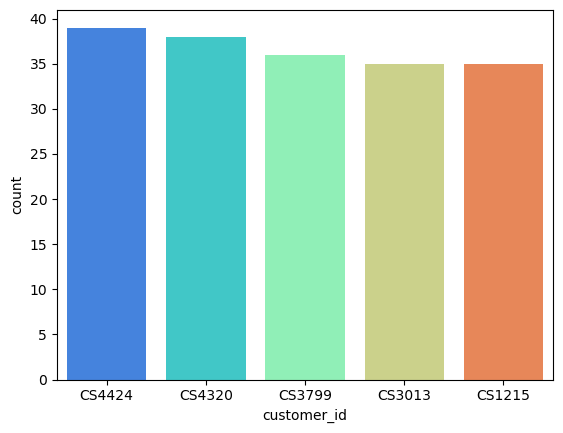

In [32]:
# creating bar plot
rainbow_colors = sns.color_palette("rainbow", len(top_5_customer))


sns.barplot(x='customer_id', y='count', hue='customer_id', data=top_5_customer, palette=rainbow_colors, dodge=False, legend=False)
plt.savefig("example_plot.png", dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# Customers having highest value of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [34]:
# sort

top_5_sales= customer_sales.sort_values(by= 'tran_amount', ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


In [35]:
# customer_id CS4424, CS4320 did more transaction and with greater amount.

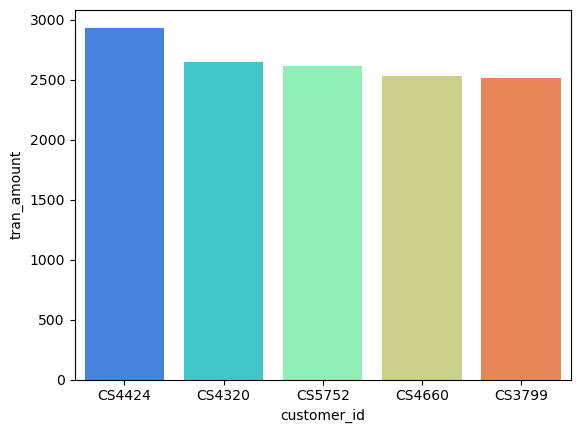

In [36]:
# creating bar plot
rainbow_colors = sns.color_palette("rainbow", len(top_5_customer))

sns.barplot(x='customer_id', y='tran_amount', hue='customer_id', data=top_5_sales, palette=rainbow_colors, dodge=False, legend=False)
plt.savefig("Top_5_customer_with_highest_purchase.png", dpi=300, bbox_inches='tight')
plt.show()

# Advanced Analytics

## Time Series Analysis

In [39]:
import matplotlib.dates as mdates

df['month_year']= df['trans_date'].dt.to_period('M')

C:\Users\bhati\AppData\Local\Temp\ipykernel_20788\919768728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


In [40]:
df

,customer_id,trans_date,tran_amount,response,month,year,month_year
0,CS5295,2013-02-11,35,1,2,2013,2013-02
1,CS4768,2015-03-15,39,1,3,2015,2015-03
2,CS2122,2013-02-26,52,0,2,2013,2013-02
3,CS1217,2011-11-16,99,0,11,2011,2011-11
4,CS1850,2013-11-20,78,0,11,2013,2013-11
...,...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011,2011-06
124996,CS7232,2014-08-19,38,0,8,2014,2014-08
124997,CS8731,2014-11-28,42,0,11,2014,2014-11
124998,CS8133,2013-12-14,13,0,12,2013,2013-12


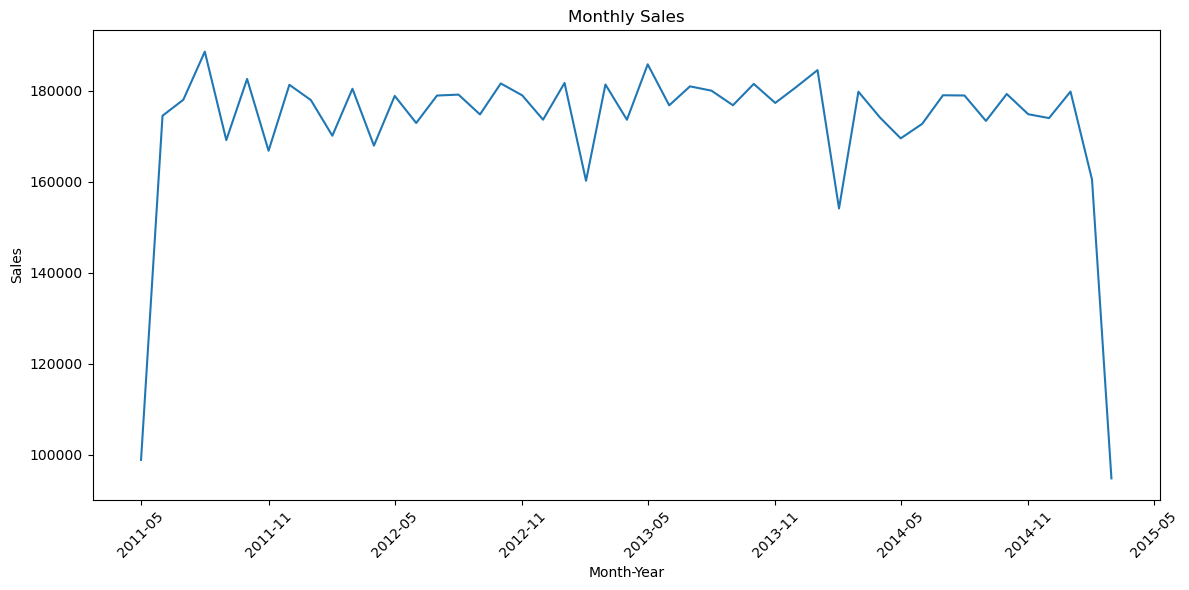

In [41]:
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Sales_over_time.png", dpi=300, bbox_inches='tight')
plt.show()



## Cohort Segmentation

In [43]:
# Recency: 'How recent a customer's last purchase was. Or How recently a customer last interected with a brand'
recency= df.groupby('customer_id')['trans_date'].max()

# Frequency: 'The number of times a customer has made a purchase OR Interected with a brand during a certain period of time'
frequency= df.groupby('customer_id')['trans_date'].count()

# Monetary: 'Monetary Value: How much money a customer spends on purchases.'
monetary= df.groupby('customer_id')['tran_amount'].sum()

#Combine
rfm= pd.DataFrame({'recency':recency, 'frequency': frequency, 'monetary':monetary})

In [44]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [69]:
# Customer segmantation


def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<= row['monetary']<=1000):
      return 'P1'
    else:
        return 'P2'

rfm['Segment']= rfm.apply(segment_customer,axis=1)

In [71]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


## Churn Analysis

### Objective: To know how well your bussiness perform, how are the reviews and rating of the customers 

<Axes: xlabel='response'>

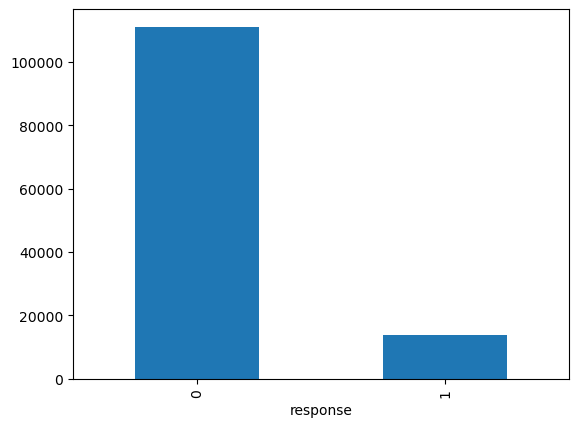

In [49]:
# Count the numbers of churned and active customers

# as per our data, response; 0= Not Satisfied and 1= Satisfied
# people who are not satisfied is 'churning people'.

churn_counts= df['response'].value_counts()

#plot
churn_counts.plot(kind='bar')

## Analyzing Top Customers

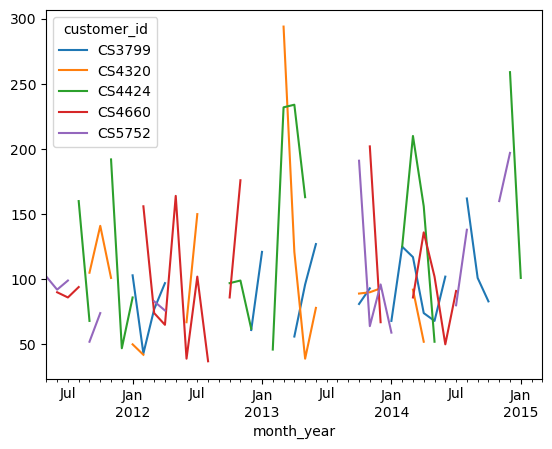

In [51]:
top_5_customers= monetary.sort_values(ascending=False).head(5).index

top_customers_df= df[df['customer_id'].isin(top_5_customers)]

top_customers_sales= top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

plt.savefig("Top_customers.png", dpi=300, bbox_inches='tight')

In [52]:
# For Phase 4, we are transforming this two DataFrame into Excel.

df.to_csv('Main_Data.csv')

In [53]:
rfm.to_csv('Add_Analysis.csv')

In [54]:
# MAke a pie chart as DAta Visulization, rfm, 'Segment' and 'monetary' columns

# Make a box plot analysis on 'transaction_amount', get the mean, IQR, Q3, Q1, Median, The maximun, minium.  

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate basic statistics
mean = df['tran_amount'].mean()
median = df['tran_amount'].median()
q1 = df['tran_amount'].quantile(0.25)
q3 = df['tran_amount'].quantile(0.75)
iqr = q3 - q1
minimum = df['tran_amount'].min()
maximum = df['tran_amount'].max()


# Print the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Q1 (25th Percentile): {q1}")
print(f"Q3 (75th Percentile): {q3}")
print(f"IQR (Interquartile Range): {iqr}")
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")


Mean: 64.99514279541326
Median: 65.0
Q1 (25th Percentile): 47.0
Q3 (75th Percentile): 83.0
IQR (Interquartile Range): 36.0
Minimum: 10
Maximum: 105


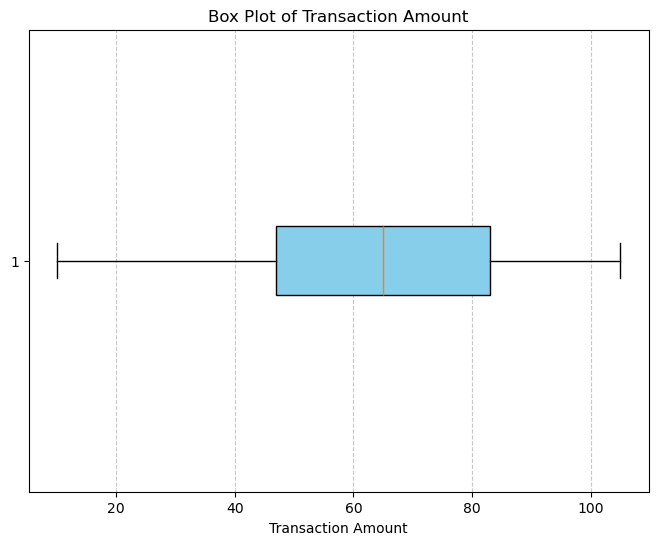

In [56]:
# Box plot visualization
plt.figure(figsize=(8, 6))
plt.boxplot(df['tran_amount'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("Box_plot.png", dpi=300, bbox_inches='tight')
plt.show()
# Display the plot

plt.show()

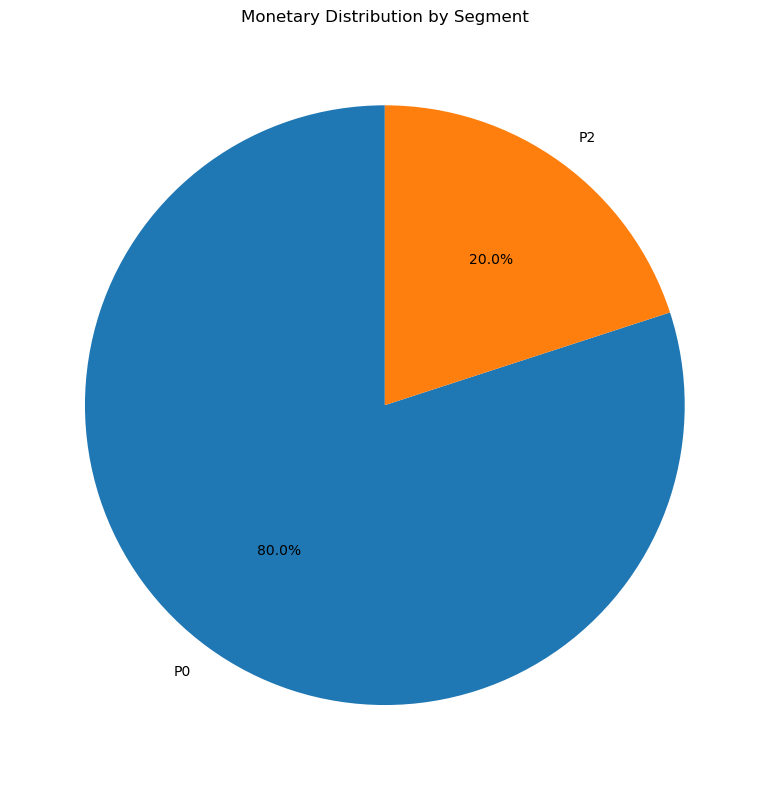

In [73]:
# Pie chart visualization

import pandas as pd
import matplotlib.pyplot as plt

# Group by Segment and calculate the total monetary value for each segment
monetary_by_segment = rfm.groupby('Segment')['monetary'].sum()


plt.figure(figsize=(8, 8))
monetary_by_segment.plot(
    kind='pie',
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Start from top
    labels=monetary_by_segment.index  # Use segment names as labels
)

# Chart title and styling
plt.title('Monetary Distribution by Segment')
plt.ylabel('')  # Remove default ylabel for better appearance
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig("Customer_segmentation.png", dpi=300, bbox_inches='tight')
plt.show()

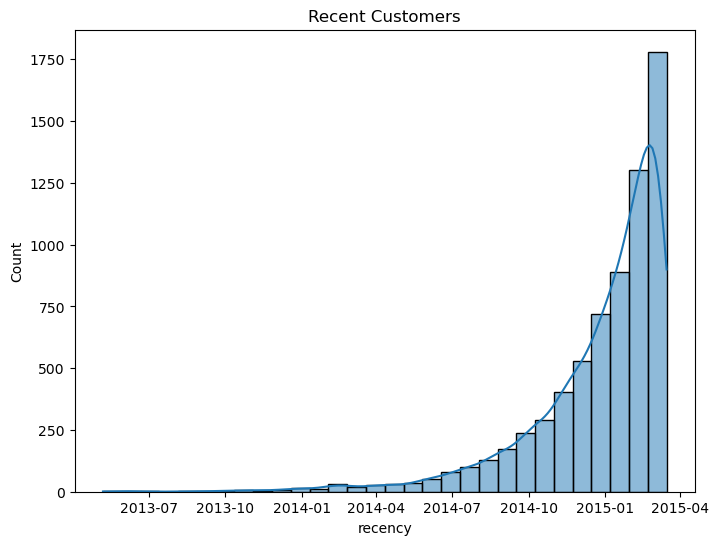

In [58]:
plt.figure(figsize=(8, 6))
sns.histplot(data=rfm, x='recency', bins=30, kde=True)
plt.title('Recent Customers')
plt.savefig("Recent Customers.png", dpi=300, bbox_inches='tight')
plt.show()

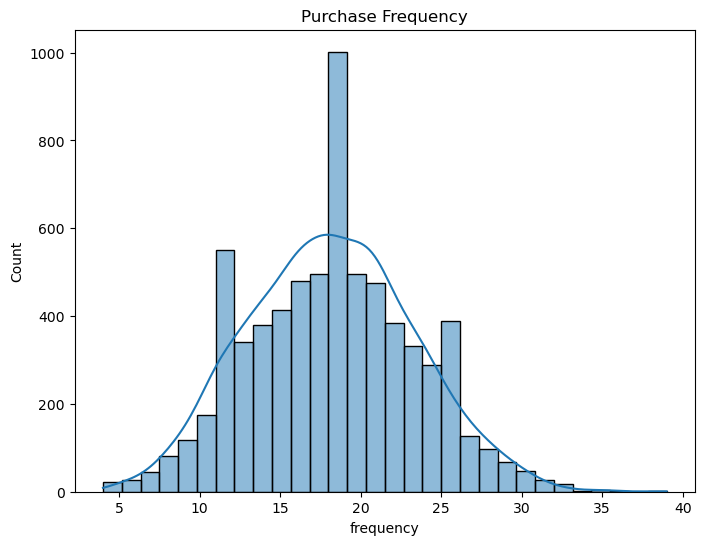

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(data=rfm, x='frequency', bins=30, kde=True)
plt.title('Purchase Frequency')
plt.savefig("Purchase_Frequency.png", dpi=300, bbox_inches='tight')
plt.show()

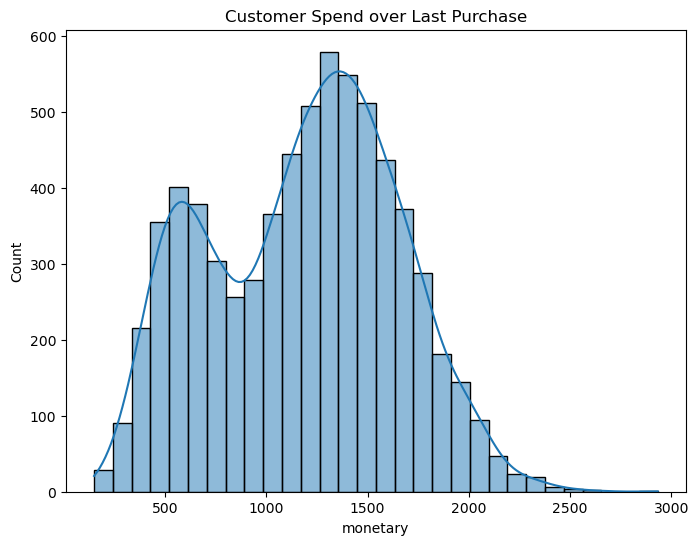

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(data=rfm, x='monetary', bins=30, kde=True)
plt.title('Customer Spend over Last Purchase')
plt.savefig("Customer_Spend_over_Last_Purchase.png", dpi=300, bbox_inches='tight')
plt.show()

# Phase 4: Reporting

## Key Metrics
### Finding important key metrics that can be calculated from the data:

In [63]:
# 1. Total Revenue
total_revenue = df['tran_amount'].sum()

# 2. Number of Unique Customers
unique_customers = df['customer_id'].nunique()

# 3. Average Transaction Value
average_transaction_value = df['tran_amount'].mean()

# Output Results
print(f"1. Total Revenue: {total_revenue}")
print(f"2. Unique Customers: {unique_customers}")
print(f"3. Average Transaction Value: {average_transaction_value}")


1. Total Revenue: 8122378
2. Unique Customers: 6884
3. Average Transaction Value: 64.99514279541326


In [64]:
# 4. Transaction Frequency (per customer)
transaction_frequency = df.groupby('customer_id')['tran_amount'].count()

# 5. Customer Retention Rate
repeat_customers = df['customer_id'].value_counts().loc[lambda x: x > 1].count()
retention_rate = (repeat_customers / unique_customers) * 100

# 6. Monthly Revenue Trends
monthly_revenue = df.groupby(df['trans_date'].dt.to_period('M'))['tran_amount'].sum()


# Output Results

print(f"4. Transaction Frequency:\n{transaction_frequency}")
print(f"5. Customer Retention Rate: {retention_rate}%")
print(f"6. Monthly Revenue Trends:\n{monthly_revenue}")

4. Transaction Frequency:
customer_id
CS1112    15
CS1113    20
CS1114    19
CS1115    22
CS1116    13
          ..
CS8996    13
CS8997    14
CS8998    13
CS8999    12
CS9000    13
Name: tran_amount, Length: 6884, dtype: int64
5. Customer Retention Rate: 100.0%
6. Monthly Revenue Trends:
trans_date
2011-05     98901
2011-06    174527
2011-07    178038
2011-08    188605
2011-09    169173
2011-10    182613
2011-11    166830
2011-12    181326
2012-01    177969
2012-02    170135
2012-03    180453
2012-04    167955
2012-05    178880
2012-06    172933
2012-07    178964
2012-08    179164
2012-09    174813
2012-10    181621
2012-11    178998
2012-12    173657
2013-01    181729
2013-02    160233
2013-03    181389
2013-04    173642
2013-05    185826
2013-06    176813
2013-07    180983
2013-08    180031
2013-09    176830
2013-10    181521
2013-11    177341
2013-12    180802
2014-01    184554
2014-02    154151
2014-03    179804
2014-04    174149
2014-05    169555
2014-06    172741
2014-07    17902

In [65]:
# 7. Response Rate
positive_responses = df['response'].value_counts().get('Yes', 0)
total_responses = df['response'].count()
response_rate = (positive_responses / total_responses) * 100

# 8. High-Value Customers
high_value_customers = df.groupby('customer_id')['tran_amount'].sum().nlargest(3)

# 9. Peak Transaction Periods
peak_periods = df.groupby(df['trans_date'].dt.date)['tran_amount'].count().nlargest(3)

# 10. Customer Segmentation (Example: High-Value Customers)
customer_segmentation = df.groupby('customer_id').agg(
    Total_Spent=('tran_amount', 'sum'),
    Transaction_Count=('tran_amount', 'count')
)
customer_segmentation['Segment'] = pd.cut(
    customer_segmentation['Total_Spent'],
    bins=[0, 300, 600, float('inf')],
    labels=['Low-Value', 'Mid-Value', 'High-Value']
)

# Output Results

print(f"7. Response Rate: {response_rate}%")
print(f"8. High-Value Customers:\n{high_value_customers}")
print(f"9. Peak Transaction Periods:\n{peak_periods}")
print(f"10. Customer Segmentation:\n{customer_segmentation}")

7. Response Rate: 0.0%
8. High-Value Customers:
customer_id
CS4424    2933
CS4320    2647
CS5752    2612
Name: tran_amount, dtype: int64
9. Peak Transaction Periods:
trans_date
2011-07-16    141
2011-09-18    124
2014-04-15    124
Name: tran_amount, dtype: int64
10. Customer Segmentation:
             Total_Spent  Transaction_Count     Segment
customer_id                                            
CS1112              1012                 15  High-Value
CS1113              1490                 20  High-Value
CS1114              1432                 19  High-Value
CS1115              1659                 22  High-Value
CS1116               857                 13  High-Value
...                  ...                ...         ...
CS8996               582                 13   Mid-Value
CS8997               543                 14   Mid-Value
CS8998               624                 13  High-Value
CS8999               383                 12   Mid-Value
CS9000               533              

In [66]:
# Create a dictionary of insights
insights = {
    "Metric": [
        "Total Revenue",
        "Unique Customers",
        "Average Transaction Value",
        "Transaction Frequency (Per Customer)",
        "Customer Retention Rate",
        "Monthly Revenue Trends",
        "Response Rate",
        "High-Value Customers",
        "Peak Transaction Periods",
        "Customer Segmentation"
    ],
    "Value": [
        total_revenue,
        unique_customers,
        f"{average_transaction_value:.2f}",
        transaction_frequency.to_dict(),  # Displayed as a dictionary
        f"{retention_rate:.2f}%",
        monthly_revenue.to_dict(),  # Displayed as a dictionary
        f"{response_rate:.2f}%",
        high_value_customers.to_dict(),  # Displayed as a dictionary
        peak_periods.to_dict(),  # Displayed as a dictionary
        customer_segmentation.to_dict('index')  # Displayed as a dictionary
    ]
}

# Convert insights to a DataFrame for better readability
insights_df = pd.DataFrame(insights)

# Display the table
insights_df

,Metric,Value
0,Total Revenue,8122378
1,Unique Customers,6884
2,Average Transaction Value,65.00
3,Transaction Frequency (Per Customer),"{'CS1112': 15, 'CS1113': 20, 'CS1114': 19, 'CS..."
4,Customer Retention Rate,100.00%
5,Monthly Revenue Trends,"{2011-05: 98901, 2011-06: 174527, 2011-07: 178..."
6,Response Rate,0.00%
7,High-Value Customers,"{'CS4424': 2933, 'CS4320': 2647, 'CS5752': 2612}"
8,Peak Transaction Periods,"{2011-07-16: 141, 2011-09-18: 124, 2014-04-15:..."
9,Customer Segmentation,"{'CS1112': {'Total_Spent': 1012, 'Transaction_..."


In [67]:
# Create a dictionary of insights
insights_2 = {
    "Metric": [
        "Mean of Transaction Amount",
        "Median of Transaction Amount",
        "Q1 (25th Percentile)",
        "Q3 (75th Percentile)",
        "IQR (Interquartile Range)",
        "Minimum Transaction Amount",
        "Maximum Transaction Amount",
    ],
    "Value": [
        mean,
        median,
        q1,
        q3,
        iqr,
        minimum,
        maximum
    ]
}

# Convert insights to a DataFrame for better readability
add_insights_df = pd.DataFrame(insights_2)

# Display the table
add_insights_df

,Metric,Value
0,Mean of Transaction Amount,64.995143
1,Median of Transaction Amount,65.000000
2,Q1 (25th Percentile),47.000000
3,Q3 (75th Percentile),83.000000
4,IQR (Interquartile Range),36.000000
5,Minimum Transaction Amount,10.000000
6,Maximum Transaction Amount,105.000000


TypeError: text() missing 1 required positional argument: 's'

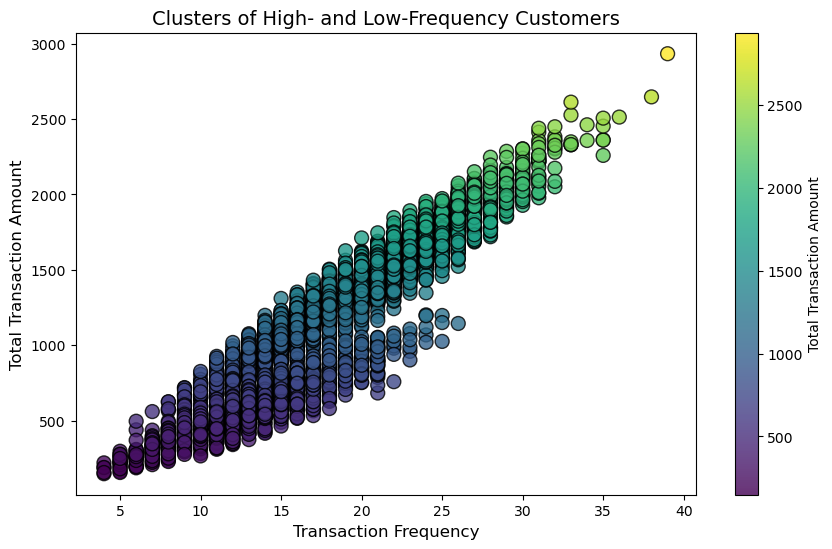

In [68]:
 #Create scatter plot
import plotly.express as px

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    rfm["frequency"],  # X-axis: Transaction Frequency
    rfm["monetary"],  # Y-axis: Total Transaction Amount
    c=rfm["monetary"],  # Color: Based on Total Amount
    cmap="viridis",  # Color map
    s=100,  # Marker size
    alpha=0.8,  # Transparency
    edgecolors="k"  # Border around points
)

# Add color bar for the scatter plot
plt.colorbar(scatter, label="Total Transaction Amount")

# Labeling the axes and the plot
plt.title("Clusters of High- and Low-Frequency Customers", fontsize=14)
plt.xlabel("Transaction Frequency", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)

# Annotate Customer IDs on the plot
for i, row in rfm.iterrows():
    plt.text(
        row["frequency"] + 0.2, 
        row["monetary"], 
       # str(row["customer_id"]), 
        fontsize=10
    )

# Show the plot
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Customer_Segmentation.png", dpi=300, bbox_inches='tight')

plt.show()